In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NUM_WORDS = 10000
MAX_LEN = 100

In [3]:
!wget https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2021-05-28 13:55:28--  https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz [following]
--2021-05-28 13:55:28--  https://www.dropbox.com/s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f55f025df1e2774cf896217bc.dl.dropboxusercontent.com/cd/0/get/BPVUcw2HqYq9Enu-_A_C5Bq7TivD7aE7WViJaBq7gpK99UD0TevDHJXcMycZ7HLPgee4QMKaSExqRpM2tDDcOnev-2NEaQhcPS0agEWt3Q3zxZKVBAFcUBOzYG7au9ogzdGQH6fTcH0czug_ZXNEZjxY/file?dl=1# [following]
--2021-05-28 13:55:28--  https://uc0f55f025df1e2774cf896217bc.dl.dropboxusercontent.com/cd/0/get/BPVUcw2HqYq9Enu-_A_C5Bq7TivD7aE7WViJaBq7

In [4]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [9]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv', header=None, names=['Class', 'Review'])

In [11]:
train

,Class,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [12]:
reviews = train['Review']
y_train = train['Class'] - 1

In [14]:
# Создание токенизатора
tokenizer = Tokenizer(num_words=NUM_WORDS)

In [18]:
# Обучение токенизатора
tokenizer.fit_on_texts(reviews)

In [19]:
# Преобразование отзывов в числое представление
sequences = tokenizer.texts_to_sequences(reviews)

In [ ]:
sequences

In [21]:
# Приведение к одной длине
x_train = pad_sequences(sequences, maxlen=MAX_LEN)

In [23]:
model = Sequential()
model.add(Embedding(NUM_WORDS, 64, input_length=MAX_LEN))
model.add(Conv1D(250, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 250)           80250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 752,507
Trainable params: 752,507
Non-trainable params: 0
________________________________________________

In [27]:
history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_split=0.1)

Epoch 1/4
3938/3938 [==============================] - 636s 161ms/step - loss: 0.1330 - accuracy: 0.9495 - val_loss: 0.1133 - val_accuracy: 0.9569
Epoch 2/4
3938/3938 [==============================] - 635s 161ms/step - loss: 0.0978 - accuracy: 0.9645 - val_loss: 0.1171 - val_accuracy: 0.9557
Epoch 3/4
3938/3938 [==============================] - 633s 161ms/step - loss: 0.0650 - accuracy: 0.9775 - val_loss: 0.1400 - val_accuracy: 0.9512
Epoch 4/4
3938/3938 [==============================] - 636s 161ms/step - loss: 0.0443 - accuracy: 0.9846 - val_loss: 0.1732 - val_accuracy: 0.9485


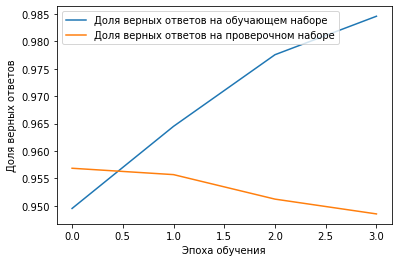

In [28]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [29]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [30]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [32]:
x_test = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [33]:
y_test = test['Class'] - 1

In [34]:
model.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 13s 11ms/step - loss: 0.2194 - accuracy: 0.9373


[0.21939872205257416, 0.9372894763946533]

In [35]:
text = '''The SmartBurger restaurant is awful. It’s a small shabby place. 
The food is really bad and very expensive.  The host and waiters are rud. 
I will never visit the SmartBurger again!
'''

In [36]:
sequence = tokenizer.texts_to_sequences([text])

In [38]:
data = pad_sequences(sequence, maxlen=MAX_LEN)

In [39]:
result = model.predict(data)

In [40]:
if result < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')

Отзыв отрицательный
